<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 δείγματα του φυτού <i>Ίρις</i> με βάση τα δεδομένα που σας δίνονται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε δείγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο σύνολο δεδομένων του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε τον βέλτιστο αριθμό των <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση το βέλτιστο αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πως λειτουργεί ο αλγόριθμος.</li>
<li>Να σχεδιάσετε τις πραγματικές κλάσεις, καθώς και τις κλάσεις που προκύπτουν από το μοντέλο <i>k-means</i>. Τι παρατηρείτε;</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>). Αναλύστε τα
αποτελέσματα. Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι
αριθμοί που χρησιμοποιούνται στο <i>iris.target</i> για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο <i>k-means</i> για τον ορισμό των <i>clusters</i>.</li>
</ul>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [2]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()

In [3]:
#print is optional
print(iris.data)
iris.feature_names
print(iris.target)
iris.target_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [5]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

### Elbow Method

In [6]:
inertia=[]
for i in range(1,7):
    mod = KMeans(n_clusters=i)
    mod.fit(x)
    inertia.append(mod.inertia_)

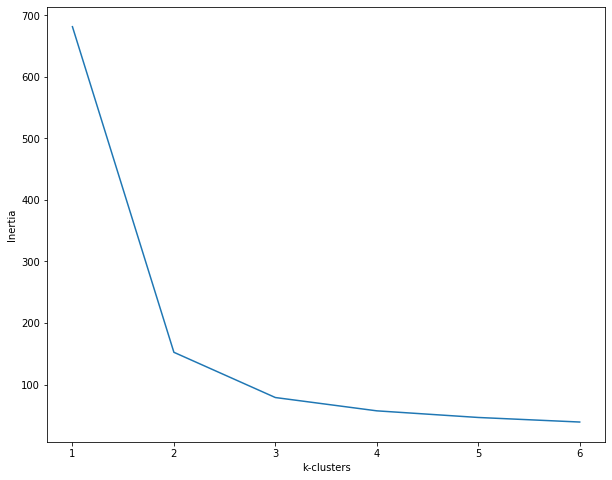

In [7]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7), inertia)
plt.xlabel('k-clusters')
plt.ylabel('Inertia')
plt.show()

Το αρχικό μας πρόβλημα είναι η κατάλληλη επιλογή του k, αριθμός clusters, που θα χρησιμοποιήσουμε για ενα εφαρμόσουμε τον αλγόριθμο του kmeans. Είναι σημαντικό να επιλέξουμε ένα k που να μην κάνει overfit τα δεδομένα μας αλλά και να μην κάνει underfit. Η μέθοδος του Elbow μας λέει πως όταν το διάγραμμα των σφαλμάτων σχηματίσει μια γωνία σαν αγκώνα, τότε αυτός είναι ο κατάλληλος αριθμός για clusters. Στην περίπτωση μας αυτή η γωνία σχηματίζεται στον k=3.

### K-Means

In [8]:
Kmod= KMeans(n_clusters=3)
Kmod.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ο αλγόριθμος k-means ακολουθεί τα εξής παρακάτω βήματα :


   
   
1.   Τυχαία επιλόγη k σημείων, που θεωρούνται ως κέντρα των clusters
2.   Για όλα τα δεδομένα υπολογίζουμε την Ευκλείδια Τετραγωνική απόσταση από όλα τα κέντρα των clusters.
3.   Αναθέτουμε κάθε δείγμα στο cluster που έχει την μικρότερη Ευκλείδια Τετραγωνική απόσταση
4.   Όταν ολοκληρώσουμε την διαδικασία για όλα τα δεδομένα, υπολογίζουμε το κέντρο κάθε cluster ως το μέσο όλων των στοιχέιων του.
5.   Ολοκληρώθηκε μια εποχή και αν δεν έχει ικανοποιηθεί το κριτήριο τερματισμού πηγαίνουμε στο βήμα 2.
6.   Σαν κρίτηριο τερματισμού μπορεί να είναι ένας μέγιστος αριθμός εποχών ή να είναι πολύ μικρή ή ελάχιστη η αλλαγή στα κέντρα των clusters ή να μην αλλάξει κανένα δείγμα cluster από την προηγούμενη εποχή.
7.   Όταν ολοκληρωθεί ο αλγόριθμος έχουμε σαν έξοδο το κέντρο κάθε cluster και όταν θα δεχθεί σαν είσοδο ένα στοιχείο θα το τοποθετήσει στο cluster με την μικρότερη Ευκλείδια Τετραγωνική απόσταση


Στην συγκεκριμένη περίπτωση κριτήριο τερματισμού είναι τα εξής :

1. Η μέγιστη διαφορά του κέντρου ενός cluster σε διαδοχικές εποχές να είναι μικρότερη από το 0.0001. Για τον υπολογισμό της διαφοράς χρησιμοποιείται το Frobenius Norm
2. O αλγόριθμος θα τρέξει το πολύ 300 εποχές και αν δεν ικανοποιηθεί το κριτήριο 1 τερματίζει.

Τέλος ο αλγόριθμος θα τρέξει 10 φορές, με 10 διαφορετικά αρχικά σημεία για κέντρα των clusters και θα επιλέξει στο τέλος τα κέντρα με την μικρότερη inertia.




### Real vs K-means Clusters

Τα δεδομένα μας έχουν 4 attributes, δηλαδή 4 διαστάσεις, το οποίο δεν βοηθάει στην οπτικοποίηση. Επομένως για την άσκηση θα επιλέξουμε τα 2 πρώτα attributes για την οπτικοποίηση και αν παρατηρήσουμε ότι δεν είναι τα κατάλληλα, καθώς δεν βοηθάνε στο "μάτι" θα δοκιμάσουμε κάποιον άλλον συνδυασμό.

Text(0.5, 1.0, 'k-means')

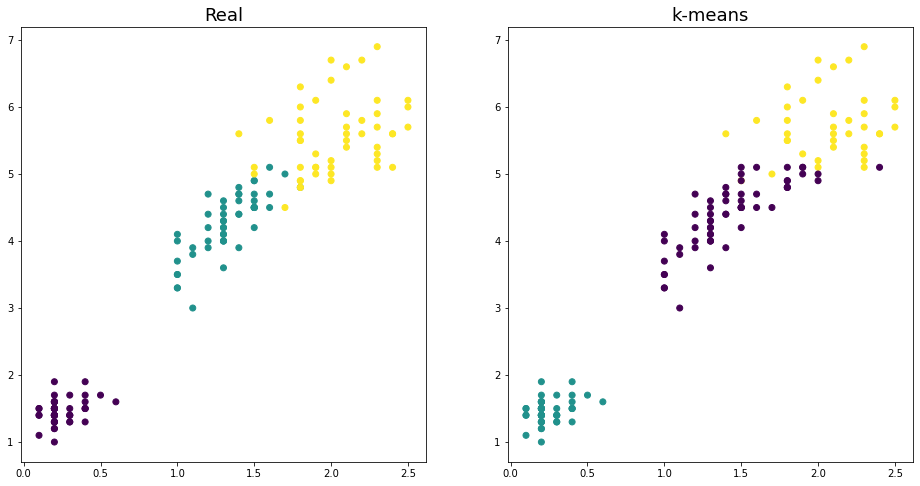

In [9]:
predictions=Kmod.predict(x)
real=y['Targets']

fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(x[x.columns[3]], x[x.columns[2]], c=real)
axes[1].scatter(x[x.columns[3]], x[x.columns[2]], c=predictions)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('k-means', fontsize=18)

Τελικά επιλέξαμε το 3ο και 4ο attribute για την οπτικοποίηση. Παρατηρούμε ορισμένα λάθη του αλγορίθμου στα πάνω clusters, αλλά η γενική εικόνα είναι ότι καταφέρνει να ανταποκριθεί αρκετά καλά.

### Confusion Matrix

Τα labels που δίνει σαν output ο αλγόριθμος του k_means δεν σχετίζονται με τα πραγματικά labels, αλλά είναι απλά μια τυχαία αρίθμηση των clusters. Για τον λόγο αυτον δεν μπορούμε να παρουσιάσουμε άμεσα έναν confusion matrix, αλλά παρουσιάζουμε το παρακάτω :

In [10]:
df = pd.DataFrame({'Labels': real, 'Clusters': predictions})

ct = pd.crosstab(df['Labels'], df['Clusters'])
print(ct)

Clusters   0   1   2
Labels              
0          0  50   0
1         48   0   2
2         14   0  36




*   Παρατηρούμε ότι από το πραγματικό label 0, δηλαδή τα setosa εχουν μπει όλα, και τα 50, στο ίδιο cluster με αριθμό 1. 
*   Παρατηρούμε ότι από το πραγματικό label 1, δηλαδή τα versicolor, έχουν μπει από τα 50, τα 48 στο cluster με αριθμό 0 και 2 έχουν μπει στο cluster με αριθμό 2.
*   Παρατηρούμε ότι από το πραγματικό label 2, δηλαδή τα virginica, έχουν μπει από τα 50, τα 14 στο cluster με αριθμό 0 και 36 έχουν μπει στο cluster με αριθμό 2.

Τα λάθη που έχουν πραγματοποιηθεί έχουν γίνει για τα 2 clusters που στο scatter plot είναι πάνω δεξιά. Οπώς βλέπουμε τα σημεία αυτά όντως βρίσκονται πολύ κοντά μεταξύ τους και δεν υπάρχει ξεκάθαρος διαχωρισμός.

